In [ ]:
# Description of problem.
Given a dataset of n values (xi, yi) such that
n = 10
x = (x1, x2, ..., x10)
y = (y1, y2, ..., y10)

Q1: Write an algorithm in pseudocode that obtains values for the slope b and y-intercept a, such that 
    the mean squared errors (MSE) are minimised (MMSE).

Q2: Using the formula obtained in Q1 above, calculate (in pseudocode here but on own paper for own verification) values 
    for a and b from a dataset of 3 values ({(𝑥1,𝑦1),(𝑥2,𝑦2),(𝑥3,𝑦3)}) such that xi maps to yi.

Q3: Implement by transfering English and Maths pseudocode to Python.
    
Q4: Test implementation using dataset from answer to Q2 as well as other datasets.

In [ ]:
Q1 
# pseudocode steps below are comparable to high-level language, i.e. not very broken down/explicit.
# For a straight line,
y = mx + c  # using this to replace of y = a + bx to avoid variable-name mix-up later down the code.
n = 10
x_mean = (sum of xi)/n 
y_mean = (sum of yi)/n

plot graph of y vs x as a straight line
let yi_hat = y value on straight line

# calculating residual errors or y-residuals ei
let ei = yi - y_hat = residual of the ith value = yi - c - m * xi

# the best line is the one that minimises the sum of the squared residuals
compute the values of c and m such that sum of (yi - c - m * xi) ** 2 is minimal

# solution of regression of y on x
deviation about x = n * sum of (xi * xi) - sum of (xi * xi) 
cross_deviation about x = n * sum of (xi * yi) - sum of xi * (sum of yi)

# rearranging solution 
c = y_mean - (slope * x_mean) -- eqn_1
m = (cross_deviation about x) / (deviation about x) -- eqn_2

solve eqn_2 to obtain value for m 
substitute m value into eqn 1 to obtain value for c




Q2

In [ ]:
# Rewriting dataset of 3 values ({(x1, y1), (x2, y2), (x3, y3)}) as list with float values.
# source of list is my imagination with linearity in mind.
x = [2.9, 5.8, 9.1] 
y = [3.0, 6.3, 10.1]
n = 3

# Calculating mean for each list
x_mean = (2.9 + 5.8 + 9.1) / 3
y_mean = (3.0 + 6.3 + 10.1) / 3
print("The mean of x is {}. ".format(x_mean))
print("The mean of y is {}. ".format(y_mean))

# eqn_1 from above becomes 6.5 = c + m * 5.9

# calculating deviation about x
sum_of_xi_squared = (2.9 * 2.9) + (5.8 * 5.8) + (9.1 * 9.1)
print("The sum of xi squared is {}. ".format(sum_of_xi_squared))

eqn_3 = n * sum_of_xi_squared
print("n times sum of xi squared is {}. ".format(n * sum_of_xi_squared))

devn_about_x = eqn_3 - sum_of_xi_squared
print("The deviation about x is {}. ".format(devn_about_x))

# calculating cross-deviation about x
sum_of_xiyi = (2.9 * 3.0) + (5.8 * 6.3) + (9.1 * 10.1)
print("The sum of xiyi is {}. ".format(sum_of_xiyi))

eqn_4 = n * sum_of_xiyi
print("n times sum of xiyi is {}. ".format(n * sum_of_xiyi))

sum_of_xi = (2.9 + 5.8 + 9.1)
print("The sum of xi is {}. ".format(sum_of_xi))

sum_of_yi = (3.0 + 6.3 + 10.1)
print("The sum of yi is {}. ".format(sum_of_yi))

eqn_5 = sum_of_xi * sum_of_yi
print("The sum of xi times sum yi is {}. ".format(sum_of_xi * sum_of_yi))

cross_deviation_about_x = eqn_4 - eqn_5
print("The cross deviation about x is {}. ".format(cross_deviation_about_x))

# substituting to obtain m
m = cross_deviation_about_x / devn_about_x
print("The value of m is given by the expression = cross deviation about x / deviation about x")
print("m is {}. ".format(m))

# substituting value of m into eqn_1 to obtain c
# y_mean = c + m * x_mean
# 6.5 = c + (0.26 * 5.9)
c = 6.5 - 1.56
print("c is {}. ".format(c))

# Therefore resulting values for a and b (equivalent to c and m) are 4.9 and 0.26 respectively.

The mean of x is 5.933333333333333. 
The mean of y is 6.466666666666666. 
The sum of xi squared is 124.85999999999999. 
n times sum of xi squared is 374.5799999999999. 
The deviation about x is 249.71999999999994. 
The sum of xiyi is 137.14999999999998. 
n times sum of xiyi is 411.44999999999993. 
The sum of xi is 17.799999999999997. 
The sum of yi is 19.4. 
The sum of xi times sum yi is 345.31999999999994. 
The cross deviation about x is 66.13. 
The value of m is given by the expression = cross deviation about x / deviation about x
m is 0.2648165945859363. 
c is 4.9399999999999995. 



Q3

Estimated coefficients:
c = 1.2363636363636363            
m = 1.1696969696969697


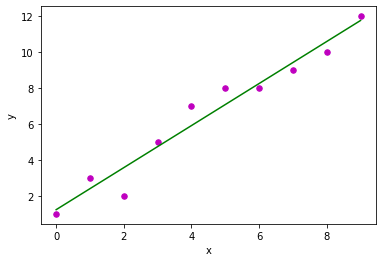

In [ ]:
# Implementation of above pseudocode in Python 3.8

# Adapted and customised code originally from www.geeksforgeeks.org

import numpy as np
import matplotlib.pyplot as plt
   
def estimate_c_and_m(x, y):
    # number of values    
    n = np.size(x)
  
    # mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating deviation and cross-deviation about x
    Deviation_about_x = np.sum(x*x) - n*x_mean*x_mean
    Cross_deviation_about_x = np.sum(y*x) - n*y_mean*x_mean
    
  
    # calculating regression coefficients
    m = Cross_deviation_about_x / Deviation_about_x
    c = y_mean - m*x_mean
  
    return (c, m)
  
def plot_regression_line(x, y, m):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted x-y relationship
    y_pred = m[0] + m[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # labelling axes
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to output plot
    plt.show()
  
def main():
    # data values
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  
    # estimating coefficients
    m = estimate_c_and_m(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(m[0], m[1]))
  
    # plotting regression line
    plot_regression_line(x, y, m)
  
if __name__ == "__main__":
    main()


Q4

Estimated coefficients:
c = -0.32881884308970744            
m = 1.145306546588153


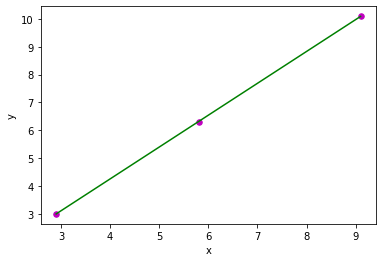

In [ ]:
# Testing implementation with 3 different datasets
# 1st test dataset : from Q2 above

# x = [2.9, 5.8, 9.1] 
# y = [3.0, 6.3, 10.1]
# n = 3

import numpy as np
import matplotlib.pyplot as plt
   
def estimate_coef(x, y):
    # number of values    
    n = np.size(x)
  
    # mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating deviation and cross-deviation about x
    Deviation_about_x = np.sum(x*x) - n*x_mean*x_mean
    Cross_deviation_about_x = np.sum(y*x) - n*y_mean*x_mean
    
  
    # calculating regression coefficients
    m = Cross_deviation_about_x / Deviation_about_x
    c = y_mean - m*x_mean
  
    return (c, m)
  
def plot_regression_line(x, y, m):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = m[0] + m[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # data values
    x = np.array([2.9, 5.8, 9.1])
    y = np.array([3.0, 6.3, 10.1])
  
    # estimating coefficients
    m = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(m[0], m[1]))
  
    # plotting regression line
    plot_regression_line(x, y, m)
  
if __name__ == "__main__":
    main()

Estimated coefficients:
c = 890.5650887573966            
m = -2.1225902898532603


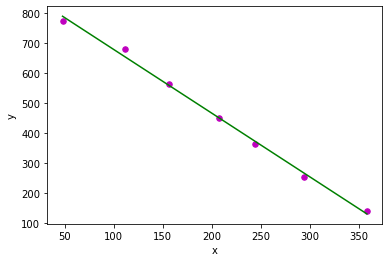

In [ ]:
# 2nd test dataset : from my imagination with linearity in mind.
# attempting one with a negative slope, i.e. inverse relationship

# x = [48, 112, 156, 207, 244, 294, 358] 
# y = [772, 678, 564, 449, 365, 255, 139]
# n = 7

import numpy as np
import matplotlib.pyplot as plt
   
def estimate_coef(x, y):
    # number of values    
    n = np.size(x)
  
    # mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating deviation and cross-deviation about x
    Deviation_about_x = np.sum(x*x) - n*x_mean*x_mean
    Cross_deviation_about_x = np.sum(y*x) - n*y_mean*x_mean
    
  
    # calculating regression coefficients
    m = Cross_deviation_about_x / Deviation_about_x
    c = y_mean - m*x_mean
  
    return (c, m)
  
def plot_regression_line(x, y, m):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = m[0] + m[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # data values
    x = np.array([48, 112, 156, 207, 244, 294, 358])
    y = np.array([772, 678, 564, 449, 365, 255, 139])
  
    # estimating coefficients
    m = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(m[0], m[1]))
  
    # plotting regression line
    plot_regression_line(x, y, m)
  
if __name__ == "__main__":
    main()


Estimated coefficients:
c = 2922.569029518847            
m = 1.0253666724641366


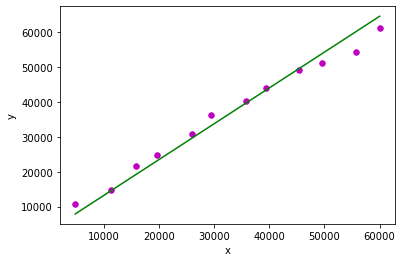

In [ ]:
# 3rd test dataset : from my imagination with linearity in mind.
# attempting one with huge integer values

# x = [4872, 11283, 15941, 19675, 26044, 29467, 35812, 39398, 45322, 49567, 55730, 60010] 
# y = [10772, 14678, 21564, 24744, 30765, 36255, 40139, 43989, 49102, 51056, 54099, 61001]
# n = 12

import numpy as np
import matplotlib.pyplot as plt
   
def estimate_coef(x, y):
    # number of values    
    n = np.size(x)
  
    # mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating deviation and cross-deviation about x
    Deviation_about_x = np.sum(x*x) - n*x_mean*x_mean
    Cross_deviation_about_x = np.sum(y*x) - n*y_mean*x_mean
    
  
    # calculating regression coefficients
    m = Cross_deviation_about_x / Deviation_about_x
    c = y_mean - m*x_mean
  
    return (c, m)
  
def plot_regression_line(x, y, m):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = m[0] + m[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # data values
    x = np.array([4872, 11283, 15941, 19675, 26044, 29467, 35812, 39398, 45322, 49567, 55730, 60010])
    y = np.array([10772, 14678, 21564, 24744, 30765, 36255, 40139, 43989, 49102, 51056, 54099, 61001])
  
    # estimating coefficients
    m = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(m[0], m[1]))
  
    # plotting regression line
    plot_regression_line(x, y, m)
  
if __name__ == "__main__":
    main()

Conclusion : Algorithm has passed the test of implementation.